In [74]:
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, LabelEncoder

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact
import os


#### Caminho das pastas

In [75]:
caminho = r'C:\Users\leand\OneDrive\Área de Trabalho\Cursos\DNC\Ser Performance'
pasta = []
for pastas in os.listdir(caminho):
    pasta.append(pastas)

print(pasta)

['00D509DB-8BE0-4ACE-A5AD-5BF37386995B', '00D509DB-8BE0-4ACE-A5AD-5BF37386995B-20240718T184006Z-001.zip', '098887C7-B9E5-4BCC-8B68-D20E94CBC297', '147229CD-F3A5-4E75-91DC-7995C01F9438', '15EDFB01-20F8-451D-968C-3D76DA48FA5D', '2BB774CA-42B6-4958-AEAD-BE99DBE606CC', '3B4192CC-761D-45BA-A325-8D023FDC6D3A', '4903AA7A-ACE3-4C66-AD62-3FDBDD13CBF5', '4A74F755-039A-4777-834D-E9D7033E9142', '4C94CE12-1188-4B0C-9122-F2BDE5CB697A', '4F8F5521-B308-4503-89B9-9482D8B24351', '4FC32C34-7C03-4291-9325-6CA7055E7777', '4FF291F2-92A7-49AF-A40E-EB76D8F18F58', '5CD89290-B8DF-414F-9720-5891CD0BCFA5', '5F4387EC-6857-4E6E-94CC-C1CBE1E4F0B4', '6F67F229-B819-4508-891F-4573DB8F3CB2', '7257F457-ED17-4DD5-B738-0C8734A36101', '752351F6-AED0-43AB-B195-EC073589A8BA', '7672F3C1-00A6-42F2-A72C-8804C289CEC9', '79816F71-04C8-4B79-A572-757A0FE29B34', '8C0E7DB8-0B34-4451-B387-795F9B751589', '9DBC9CF3-7B21-410E-A27F-34589AAC3A20', 'A2687A1C-CA71-4245-8697-FE717B66DBF8', 'AB2282B0-7703-42B8-9F34-C06B4EC78790', 'ACE6D50E-AD7E

### usei o laço de repetição para buscar e já nomear as tabelas

In [76]:
cliente =  caminho + '\\' + pasta[0] + '\\'

for csv in os.listdir(cliente):
    if csv.endswith('.csv'):
        if 'acessos' in csv:
            acessos = pd.read_csv(cliente + csv)
        if 'campanha' in csv:
            campanha = pd.read_csv(cliente + csv)
        if 'feedback' in csv:
            feedback = pd.read_csv(cliente + csv)
        if 'produto' in csv:
            produto = pd.read_csv(cliente + csv)
        if 'treinamento' in csv:
            treinamento = pd.read_csv(cliente + csv)
        if 'vendas' in csv:
            vendas = pd.read_csv(cliente + csv)

In [77]:
acessos.head()


,Data,Funcionario,Unidade,Quantidade_de_Acessos,CLI_CODIGO
0,2023-06-05,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,9,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
1,2023-06-10,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,6,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
2,2023-06-14,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
3,2023-06-16,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,2,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
4,2023-06-20,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,5,00D509DB-8BE0-4ACE-A5AD-5BF37386995B


#### Acessos por Funcionário

In [78]:
funcacessos = acessos.groupby('Funcionario')['Quantidade_de_Acessos'].sum().sort_values(ascending=False)
funcacessos.head(10)

Funcionario
B20A3E46-7DBF-46E9-BDEA-5B13AAB08CE0    18522
4058BE4C-CD1A-40D3-89A6-76142B2BE39D    12584
DCFBB00A-4F15-45E3-83D0-B04E0292BB6E    10129
9D6A61EF-89BD-4AAD-9B83-5ECE41B49C4D     5236
5822DC47-B851-42C3-BDE0-BC9ABAFFBC57     3641
4716A6E5-20E3-42F0-81C6-CCD88070E648     3495
46AAF177-3F15-4CAB-BF67-27DBE9CC6748     2577
29CE7071-A7F0-4FCC-8348-E8F3A19FB381     2576
0EA7A9D3-8569-4082-AA86-9346CF60A095     2399
AC5D28E1-3B90-4D0D-870A-52E3C156AC64     2111
Name: Quantidade_de_Acessos, dtype: int64

#### Acessos por Unidade

In [79]:
unidade = acessos.groupby('Unidade')['Quantidade_de_Acessos'].sum().sort_values(ascending=False)
unidade.head(10)

Unidade
2F775CDD-74A9-4516-B2A4-6D7E643E96EA    25469
FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6    22365
6CAD2F0B-5D9B-4C84-BEAD-D63EFEAB244B    20948
1E3AB2C8-DDB6-4981-AC30-EFFAD5F4DFAC     6142
01CB393F-3FA5-4CFF-95CB-278FC01C9EC6     1934
Name: Quantidade_de_Acessos, dtype: int64

In [80]:
produto.head()

,Data,Produto,Categoria,Unidade,N_Produtos,Vlr_Bruto,Vlr_Desconto,Vlr_Liquido,cli_codigo
0,2021-01-01,NaN,AA84C2C5-9ADD-4CF4-AA02-1E05F85CDACD,2F775CDD-74A9-4516-B2A4-6D7E643E96EA,6.0,528.0,0.0,528.0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
1,2021-01-01,NaN,68D0E2AE-FEC4-4FCD-8DD9-318A15AD0B6F,2F775CDD-74A9-4516-B2A4-6D7E643E96EA,1.0,102.9,0.0,102.9,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
2,2021-01-01,NaN,56865B8F-FB8E-427D-B7CB-5557665DCBE5,2F775CDD-74A9-4516-B2A4-6D7E643E96EA,5.0,1253.0,0.0,1253.0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
3,2021-01-01,NaN,232926E7-A4C4-49A2-A4D1-8110B378576B,2F775CDD-74A9-4516-B2A4-6D7E643E96EA,10.0,270.0,0.0,270.0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
4,2021-01-01,NaN,37B78DF7-204A-4F20-A1B2-D0FFC029F386,2F775CDD-74A9-4516-B2A4-6D7E643E96EA,7.0,9770.0,-752.6,9017.4,00D509DB-8BE0-4ACE-A5AD-5BF37386995B


In [81]:
vendas.shape

(10719, 9)

In [82]:
vendas.head()

,Data,Funcionario,Unidade,N_Boletos,N_Produtos,Vlr_Bruto,Vlr_Desconto,Vlr_Liquido,cli_codigo
0,2023-06-02,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,165.0,0.0,165.0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
1,2023-06-03,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,915.0,0.0,915.0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
2,2023-06-05,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,1460.0,116.8,1343.2,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
3,2023-06-06,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,4.0,6850.0,685.0,6165.0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
4,2023-06-07,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,3,6.0,6867.0,511.0,6356.0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B


#### Criei a coluna devoluções

In [83]:
vendas['Devolucoes'] = vendas.apply(lambda row: 'S' if pd.isna(row['N_Produtos']) or row['N_Produtos'] <= 0 else 'N', axis=1)


### Ticket médio

In [84]:
tcktmedio = vendas['Vlr_Bruto'].sum() / vendas.shape[0]
print(f'Ticket médio: R${tcktmedio:.2f}')

Ticket médio: R$10124.14


### Faturamento sem descontos

In [85]:
FatBruto = vendas['Vlr_Bruto'].sum()
print(f'Faturamento bruto: R$ {FatBruto:.2f}')

Faturamento bruto: R$ 108520678.86


### Faturamento com descontos

In [86]:
fatliq = vendas['Vlr_Liquido'].sum()
print(f'Faturamento líquido:  {fatliq:.2f}')

Faturamento líquido:  101700863.59


### Total de Descontos

In [87]:
total_descontos = vendas['Vlr_Desconto'].sum()
print(f'Total de descontos:  {total_descontos:.2f}')

Total de descontos:  5287770.73


#### Total de produtos vendidos

In [88]:
totprod = vendas['N_Produtos'].sum()
print(f'Total de produtos:  {totprod:.0f} unidades')

Total de produtos:  175116 unidades


#### Top 10 Funcionários que mais venderam

In [89]:
func_rank = vendas['Funcionario'].value_counts()
top10func = func_rank.head(10)
top10func

Funcionario
B20A3E46-7DBF-46E9-BDEA-5B13AAB08CE0    1281
5822DC47-B851-42C3-BDE0-BC9ABAFFBC57     901
0EA7A9D3-8569-4082-AA86-9346CF60A095     862
46AAF177-3F15-4CAB-BF67-27DBE9CC6748     809
24985D0E-9EDF-443D-BF33-CE5CD150100B     778
21A46DC1-490D-4077-9038-8BF460B71751     740
6E478F40-59BE-4210-BFD7-E8F236A02724     568
AC5D28E1-3B90-4D0D-870A-52E3C156AC64     536
4716A6E5-20E3-42F0-81C6-CCD88070E648     529
E6C62F5A-21C7-4F83-B6A2-83A03B208343     512
Name: count, dtype: int64

#### Funcionários que menos venderam

In [90]:
tail10func = func_rank.tail(10)
tail10func

Funcionario
F69F7D87-4788-40F3-890B-997300670DAA    27
4058BE4C-CD1A-40D3-89A6-76142B2BE39D    18
56D190B4-86F4-404B-B94F-6B57C54EB2D0    16
DC582867-D718-46E5-8036-1C0317044475    13
75CAA7DE-1065-48CD-9EFF-4C1AAFE4CF29    11
D28853F4-40DB-45A7-99E9-52E5FAD1C3B1     9
2F01257F-2824-40E1-BF56-1B1813D81792     7
9248F096-EC8F-4948-AD93-D30C3DBE701F     4
76F47389-5FC9-4D79-9C4E-EEEF9FAF10BE     2
1A2B6CA2-1951-4D41-A175-85C8E8312564     1
Name: count, dtype: int64

#### Devoluções

In [91]:
devolucao = vendas['Devolucoes'].value_counts()
devolucao

Devolucoes
N    10346
S      373
Name: count, dtype: int64

#### Total de funcionários desse cliente

In [92]:
total_funcionarios = len(vendas['Funcionario'].unique())
print(f'Nessa unidade temos:  {total_funcionarios} funcionários')

Nessa unidade temos:  40 funcionários


In [93]:
funcionarios_devoluçoes = vendas.groupby('Funcionario')['Devolucoes'].value_counts().reset_index()
funcionarios_devolucoes = funcionarios_devoluçoes.sort_values(by='count', ascending=False)

funcionarios_dev_S = funcionarios_devolucoes[funcionarios_devolucoes['Devolucoes'] == 'S']	

top10func_dev_x_fat = funcionarios_dev_S.head(10)


### (Top 10)  Funcionário que tiveram Devolução

In [94]:
contagem = top10func_dev_x_fat.groupby('count')

In [95]:
contagem.head(10)

,Funcionario,Devolucoes,count
3,0EA7A9D3-8569-4082-AA86-9346CF60A095,S,33
60,AC5D28E1-3B90-4D0D-870A-52E3C156AC64,S,31
24,46AAF177-3F15-4CAB-BF67-27DBE9CC6748,S,25
26,4716A6E5-20E3-42F0-81C6-CCD88070E648,S,25
49,913BBDB4-F391-46FC-A805-96809536B1F4,S,24
38,6E478F40-59BE-4210-BFD7-E8F236A02724,S,21
36,5822DC47-B851-42C3-BDE0-BC9ABAFFBC57,S,21
72,E6C62F5A-21C7-4F83-B6A2-83A03B208343,S,19
16,24985D0E-9EDF-443D-BF33-CE5CD150100B,S,18
56,A3C61F2F-F4AE-4823-ADD4-B566315C7467,S,17


### Faturamento dos 10 Funcionários que mais tiveram devolução

In [96]:
for fat_p_func in top10func_dev_x_fat['Funcionario']:
    fat_func = vendas[vendas['Funcionario'] == fat_p_func]['Vlr_Liquido'].sum()
    top10func_dev_x_fat['Faturamento_Liquido'] = top10func_dev_x_fat['Funcionario'].apply(
    lambda x: vendas[vendas['Funcionario'] == x]['Vlr_Liquido'].sum()
)
    print(f'Faturamento líquido do funcionário {fat_p_func}: R$ {fat_func:.2f}')

Faturamento líquido do funcionário 0EA7A9D3-8569-4082-AA86-9346CF60A095: R$ 6440970.96
Faturamento líquido do funcionário AC5D28E1-3B90-4D0D-870A-52E3C156AC64: R$ 3390391.16
Faturamento líquido do funcionário 46AAF177-3F15-4CAB-BF67-27DBE9CC6748: R$ 5855467.40
Faturamento líquido do funcionário 4716A6E5-20E3-42F0-81C6-CCD88070E648: R$ 4888718.20
Faturamento líquido do funcionário 913BBDB4-F391-46FC-A805-96809536B1F4: R$ 1376148.15
Faturamento líquido do funcionário 6E478F40-59BE-4210-BFD7-E8F236A02724: R$ 5025550.60
Faturamento líquido do funcionário 5822DC47-B851-42C3-BDE0-BC9ABAFFBC57: R$ 6693175.44
Faturamento líquido do funcionário E6C62F5A-21C7-4F83-B6A2-83A03B208343: R$ 3040675.69
Faturamento líquido do funcionário 24985D0E-9EDF-443D-BF33-CE5CD150100B: R$ 5222761.04
Faturamento líquido do funcionário A3C61F2F-F4AE-4823-ADD4-B566315C7467: R$ 2156454.07


C:\Users\leand\AppData\Local\Temp\ipykernel_24636\2000809892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10func_dev_x_fat['Faturamento_Liquido'] = top10func_dev_x_fat['Funcionario'].apply(


In [97]:
top10func_dev_x_fat

,Funcionario,Devolucoes,count,Faturamento_Liquido
3,0EA7A9D3-8569-4082-AA86-9346CF60A095,S,33,6440970.96
60,AC5D28E1-3B90-4D0D-870A-52E3C156AC64,S,31,3390391.16
24,46AAF177-3F15-4CAB-BF67-27DBE9CC6748,S,25,5855467.40
26,4716A6E5-20E3-42F0-81C6-CCD88070E648,S,25,4888718.20
49,913BBDB4-F391-46FC-A805-96809536B1F4,S,24,1376148.15
38,6E478F40-59BE-4210-BFD7-E8F236A02724,S,21,5025550.60
36,5822DC47-B851-42C3-BDE0-BC9ABAFFBC57,S,21,6693175.44
72,E6C62F5A-21C7-4F83-B6A2-83A03B208343,S,19,3040675.69
16,24985D0E-9EDF-443D-BF33-CE5CD150100B,S,18,5222761.04
56,A3C61F2F-F4AE-4823-ADD4-B566315C7467,S,17,2156454.07


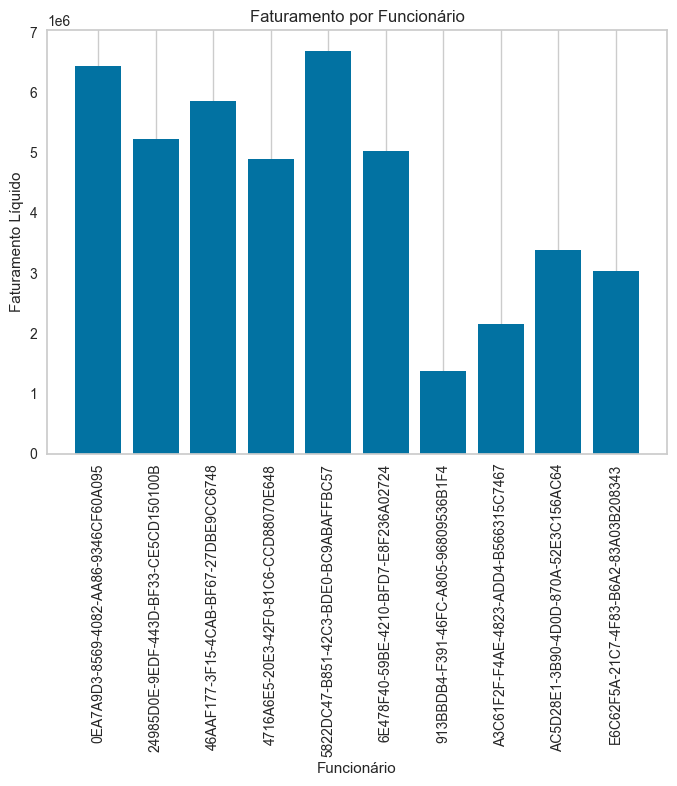

In [98]:
grouped_data = top10func_dev_x_fat.groupby('Funcionario')['Faturamento_Liquido'].sum().reset_index()

# Criando as barras
plt.bar(grouped_data['Funcionario'], grouped_data['Faturamento_Liquido']) 
plt.xticks(rotation=90)

plt.xlabel('Funcionário')
plt.ylabel('Faturamento Líquido')
plt.title('Faturamento por Funcionário')
plt.grid(axis='y')

plt.show()

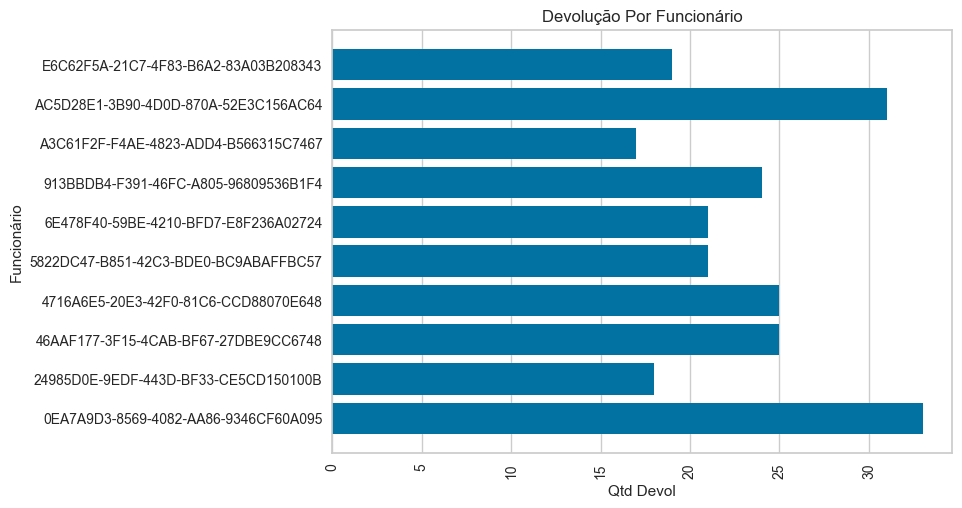

In [99]:
grouped_data = top10func_dev_x_fat.groupby('Funcionario')['count'].sum().reset_index()

# Criando as barras
plt.barh(grouped_data['Funcionario'], grouped_data['count']) 
plt.xticks(rotation=90)

plt.xlabel('Qtd Devol')
plt.ylabel('Funcionário')
plt.title('Devolução Por Funcionário')
plt.grid(axis='y')

plt.show()

In [100]:
treinamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Periodo                15 non-null     object 
 1   Treinamento            15 non-null     object 
 2   Categoria_Treinamento  15 non-null     object 
 3   Funcionario            15 non-null     object 
 4   Unidade                15 non-null     object 
 5   Nota_Final             0 non-null      float64
 6   Status                 15 non-null     object 
 7   Cliente                15 non-null     object 
dtypes: float64(1), object(7)
memory usage: 1.1+ KB


In [101]:
acessosfunc = []
for acesso in acessos['Funcionario'].unique():
    acessosfunc.append(acesso)
   

print(acessosfunc)

['8EB10BCB-42E7-42EF-AF88-07BE7BA740C3', '87020CDD-3AC0-4CF3-AAE9-0E83E9F0F4ED', '4B01485B-97C0-4CA3-9A28-25CAD5E88A5D', '46AAF177-3F15-4CAB-BF67-27DBE9CC6748', 'F32A4C9A-D383-4562-8D41-3342B0D610BF', '99BF558B-4A90-4345-9B70-37FD34046482', '0AC5D5EB-C86E-4EE6-9ACE-45F8D6BA3DAF', '75CAA7DE-1065-48CD-9EFF-4C1AAFE4CF29', '1B02A6F2-EAB1-4B45-A42F-52395994B771', 'AC5D28E1-3B90-4D0D-870A-52E3C156AC64', 'B20A3E46-7DBF-46E9-BDEA-5B13AAB08CE0', '9D6A61EF-89BD-4AAD-9B83-5ECE41B49C4D', '56D190B4-86F4-404B-B94F-6B57C54EB2D0', 'B43EDEA0-0A8C-43CB-85C4-71DC7988AB83', '3D12BBBC-7495-4FF0-BD47-74928356D44C', '0EC8F52A-1026-494E-B0A4-7533F2007EE2', '4058BE4C-CD1A-40D3-89A6-76142B2BE39D', 'E6C62F5A-21C7-4F83-B6A2-83A03B208343', '04409943-9025-4014-A517-855604E0F2F3', '21A46DC1-490D-4077-9038-8BF460B71751', '0EA7A9D3-8569-4082-AA86-9346CF60A095', '913BBDB4-F391-46FC-A805-96809536B1F4', 'F69F7D87-4788-40F3-890B-997300670DAA', 'DCFBB00A-4F15-45E3-83D0-B04E0292BB6E', 'A3C61F2F-F4AE-4823-ADD4-B566315C7467',

In [102]:
funcionarios = []
for funcionario in treinamento['Funcionario'].unique():
    funcionarios.append(funcionario)
   

print(funcionarios)

['4A8ED9EE-2276-40D3-A626-095EA6920B6D', 'B20A3E46-7DBF-46E9-BDEA-5B13AAB08CE0', 'F69F7D87-4788-40F3-890B-997300670DAA', '4058BE4C-CD1A-40D3-89A6-76142B2BE39D', 'DCFBB00A-4F15-45E3-83D0-B04E0292BB6E', '29CE7071-A7F0-4FCC-8348-E8F3A19FB381']


In [103]:
acessos.head()

,Data,Funcionario,Unidade,Quantidade_de_Acessos,CLI_CODIGO
0,2023-06-05,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,9,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
1,2023-06-10,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,6,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
2,2023-06-14,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
3,2023-06-16,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,2,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
4,2023-06-20,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,5,00D509DB-8BE0-4ACE-A5AD-5BF37386995B


In [104]:
vendas['Treinamento'] = 'S'

In [105]:
vendas['Treinamento'].value_counts()

Treinamento
S    10719
Name: count, dtype: int64

In [106]:
vendas['Acessos'] = 0

In [107]:
acessos.Data = pd.to_datetime(acessos.Data)

In [108]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10719 entries, 0 to 10718
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          10719 non-null  object 
 1   Funcionario   10719 non-null  object 
 2   Unidade       10719 non-null  object 
 3   N_Boletos     10719 non-null  int64  
 4   N_Produtos    10719 non-null  float64
 5   Vlr_Bruto     10719 non-null  float64
 6   Vlr_Desconto  10719 non-null  float64
 7   Vlr_Liquido   10719 non-null  float64
 8   cli_codigo    10719 non-null  object 
 9   Devolucoes    10719 non-null  object 
 10  Treinamento   10719 non-null  object 
 11  Acessos       10719 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 1005.0+ KB


In [109]:
vendas.head()

,Data,Funcionario,Unidade,N_Boletos,N_Produtos,Vlr_Bruto,Vlr_Desconto,Vlr_Liquido,cli_codigo,Devolucoes,Treinamento,Acessos
0,2023-06-02,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,165.0,0.0,165.0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,S,0
1,2023-06-03,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,915.0,0.0,915.0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,S,0
2,2023-06-05,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,1460.0,116.8,1343.2,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,S,0
3,2023-06-06,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,4.0,6850.0,685.0,6165.0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,S,0
4,2023-06-07,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,3,6.0,6867.0,511.0,6356.0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,S,0


In [110]:
acessos['Data'] = acessos['Data'].astype(str)

In [111]:
vendas = pd.merge(vendas, acessos, how='left', on=['Data', 'Funcionario'])
vendas['Acessos'] = vendas['Quantidade_de_Acessos'].fillna(0)  # Preenche NaN com 0 (opcional)
vendas = vendas.drop('Quantidade_de_Acessos', axis=1)
vendas

,Data,Funcionario,Unidade_x,N_Boletos,N_Produtos,Vlr_Bruto,Vlr_Desconto,Vlr_Liquido,cli_codigo,Devolucoes,Treinamento,Acessos,Unidade_y,CLI_CODIGO
0,2023-06-02,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,165.00,0.00,165.00,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,S,0.0,NaN,NaN
1,2023-06-03,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,915.00,0.00,915.00,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,S,0.0,NaN,NaN
2,2023-06-05,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,1460.00,116.80,1343.20,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,S,9.0,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
3,2023-06-06,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,4.0,6850.00,685.00,6165.00,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,S,0.0,NaN,NaN
4,2023-06-07,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,3,6.0,6867.00,511.00,6356.00,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,S,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10714,2024-06-25,1DFE9DC7-E738-42F5-B34B-F187C8762CE0,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,2,4.0,2730.50,273.05,2457.45,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,S,0.0,NaN,NaN
10715,2024-06-26,1DFE9DC7-E738-42F5-B34B-F187C8762CE0,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,-2.0,-2441.00,374.00,-2815.00,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,S,S,4.0,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
10716,2024-06-27,1DFE9DC7-E738-42F5-B34B-F187C8762CE0,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,4,86.0,19423.50,1942.35,17481.15,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,S,6.0,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
10717,2024-06-28,1DFE9DC7-E738-42F5-B34B-F187C8762CE0,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,3,7.0,3769.05,0.00,3769.05,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,S,0.0,NaN,NaN


In [112]:
for i, f in enumerate(funcionarios):
    if f in vendas['Funcionario'][i]:
        vendas['Treinamento'][i] = 'S'
    else:
        vendas['Treinamento'][i] = 'N'

C:\Users\leand\AppData\Local\Temp\ipykernel_24636\3859859234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas['Treinamento'][i] = 'N'
C:\Users\leand\AppData\Local\Temp\ipykernel_24636\3859859234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas['Treinamento'][i] = 'N'
C:\Users\leand\AppData\Local\Temp\ipykernel_24636\3859859234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas['Treinamento'][i] = 'N'
C:\User

In [113]:
vendas.Data = pd.to_datetime(vendas.Data)

In [114]:
vendas = vendas.drop(columns=['cli_codigo'], axis=1)	

In [115]:
vendas = vendas.fillna(0)

In [116]:
vendas.Acessos.nunique()

72

In [119]:
vendas['Unidade_x'] = vendas['Unidade_x'].rename('Unidade')

In [117]:
vendas = vendas.drop(columns=['Unidade_y', 'CLI_CODIGO'], axis=1)
vendas.head()

,Data,Funcionario,Unidade_x,N_Boletos,N_Produtos,Vlr_Bruto,Vlr_Desconto,Vlr_Liquido,Devolucoes,Treinamento,Acessos
0,2023-06-02,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,165.0,0.0,165.0,N,N,0.0
1,2023-06-03,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,915.0,0.0,915.0,N,N,0.0
2,2023-06-05,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,1460.0,116.8,1343.2,N,N,9.0
3,2023-06-06,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,4.0,6850.0,685.0,6165.0,N,N,0.0
4,2023-06-07,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,3,6.0,6867.0,511.0,6356.0,N,N,0.0


In [33]:
vendas = vendas.drop(columns=['cli_codigo'])

In [63]:
vendas.Data.agg(['min', 'max'])	

min   2021-01-01
max   2024-07-01
Name: Data, dtype: datetime64[ns]

<Axes: >

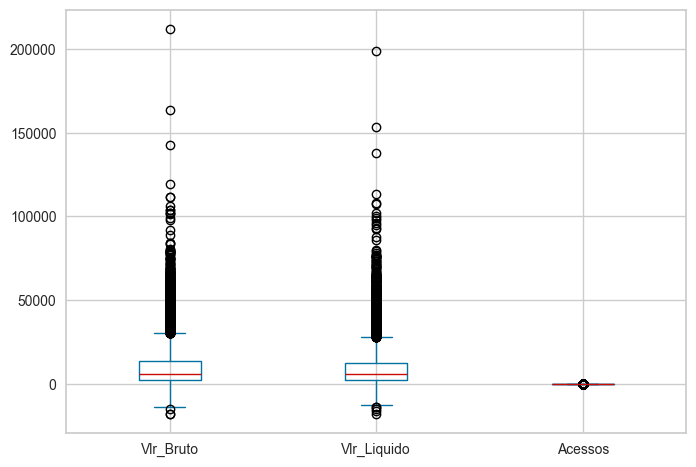

In [66]:
vendas[['Vlr_Bruto', 'Vlr_Liquido', 'Acessos']].plot.box()

In [120]:

def analisar_dados(df):

    # Filtra apenas as linhas onde ambas as colunas existem
    df = df[['Devolucoes', 'Treinamento']].dropna()

    # Cria uma nova coluna com a combinação dos valores
    df['Combinacao'] = df['Devolucoes'] + '_' + df['Treinamento']

    # Conta a frequência de cada combinação
    contagens = df['Combinacao'].value_counts().to_dict()

    # Retorna um dicionário com as contagens desejadas
    return {
        'Ambos Sim': contagens.get('S_S', 0),
        'S em Devoluções e N em Treinamento': contagens.get('S_N', 0),
        'N em Devoluções e S em Treinamento': contagens.get('N_S', 0)
    }

# Carregando o DataFrame (substitua 'seu_arquivo.csv' pelo seu arquivo)
# Chamando a função e imprimindo os resultados
resultados = analisar_dados(vendas)
print(resultados)


{'Ambos Sim': 373, 'S em Devoluções e N em Treinamento': 0, 'N em Devoluções e S em Treinamento': 10340}


In [121]:
vendas['Devolucoes'] = vendas['Devolucoes'].map({'S': 1, 'N': 0})
vendas['Treinamento'] = vendas['Treinamento'].map({'S': 1, 'N': 0})

In [123]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10719 entries, 0 to 10718
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          10719 non-null  datetime64[ns]
 1   Funcionario   10719 non-null  object        
 2   Unidade_x     10719 non-null  object        
 3   N_Boletos     10719 non-null  int64         
 4   N_Produtos    10719 non-null  float64       
 5   Vlr_Bruto     10719 non-null  float64       
 6   Vlr_Desconto  10719 non-null  float64       
 7   Vlr_Liquido   10719 non-null  float64       
 8   Devolucoes    10719 non-null  int64         
 9   Treinamento   10719 non-null  int64         
 10  Acessos       10719 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 921.3+ KB


In [70]:
vendas.head()

,Data,Funcionario,N_Boletos,N_Produtos,Vlr_Bruto,Vlr_Desconto,Vlr_Liquido,Devolucoes,Treinamento,Acessos
0,2023-06-02,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,1,1.0,165.0,0.0,165.0,0,0,0.0
1,2023-06-03,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,1,1.0,915.0,0.0,915.0,0,0,0.0
2,2023-06-05,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,1,1.0,1460.0,116.8,1343.2,0,0,9.0
3,2023-06-06,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,1,4.0,6850.0,685.0,6165.0,0,0,0.0
4,2023-06-07,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,3,6.0,6867.0,511.0,6356.0,0,0,0.0


In [127]:
numerical_columns = ['N_Produtos', 'Vlr_Bruto', 'Vlr_Liquido', 'Vlr_Desconto', 'Acessos']
vendas[numerical_columns] = vendas[numerical_columns].apply(scale)

In [72]:
categorical_columns = ['Funcionario', 'Unidade']
categorical_idx = vendas.columns.isin(categorical_columns).nonzero()[0].tolist()

In [125]:
vendas.Funcionario = LabelEncoder().fit_transform(vendas.Funcionario)
vendas.Unidade_x = LabelEncoder().fit_transform(vendas.Unidade_x
                                                )

In [129]:


vendas.head()

,Funcionario,Unidade_x,N_Boletos,N_Produtos,Vlr_Bruto,Vlr_Desconto,Vlr_Liquido,Devolucoes,Treinamento,Acessos
0,24,13,1,-0.698443,-0.785953,-0.547908,-0.775765,0,0,-0.513260
1,24,13,1,-0.698443,-0.726765,-0.547908,-0.713357,0,0,-0.513260
2,24,13,1,-0.698443,-0.683755,-0.418181,-0.677726,0,0,0.728831
3,24,13,1,-0.561824,-0.258388,0.212908,-0.276501,0,0,-0.513260
4,24,13,3,-0.470744,-0.257046,0.019650,-0.260608,0,0,-0.513260


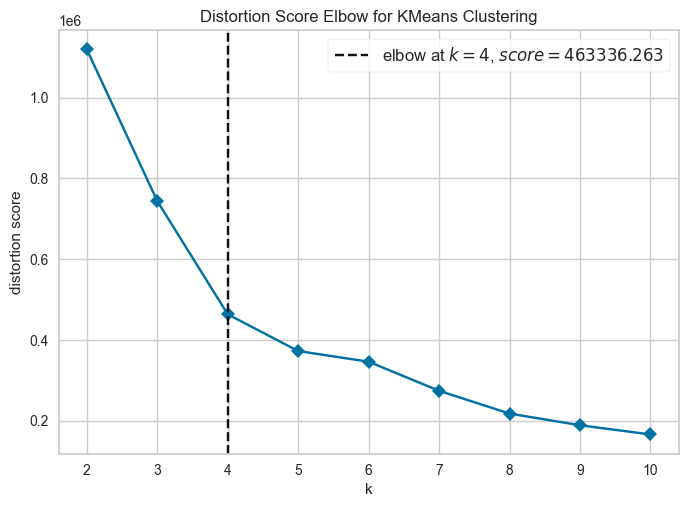

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [130]:
kelbow_visualizer(KMeans(), vendas, k=10, timings=False)

In [131]:
# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = vendas.copy()

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,1119284.911617,0.520200,0.842579,12127.851524
3,743833.276556,0.448866,0.778323,11828.313870
4,463336.263261,0.471430,0.800598,14820.388538
5,372067.679231,0.485763,0.745330,14497.630785
6,330458.676433,0.487263,0.730340,13327.017463
7,289707.034095,0.450519,0.839624,12918.003505
8,258718.196101,0.424312,0.746600,12580.949613
9,246771.025936,0.402547,0.874945,11605.024855
10,181264.995639,0.444646,0.821041,14472.142759


In [132]:
kmeans = KMeans(4)
kmeans_labels = kmeans.fit_predict(vendas)

In [138]:
px.scatter_3d(vendas, x='Acessos', y='Vlr_Liquido', z='N_Boletos', color=kmeans_labels.astype(str), color_discrete_sequence=px.colors.qualitative.D3, template='plotly_dark')

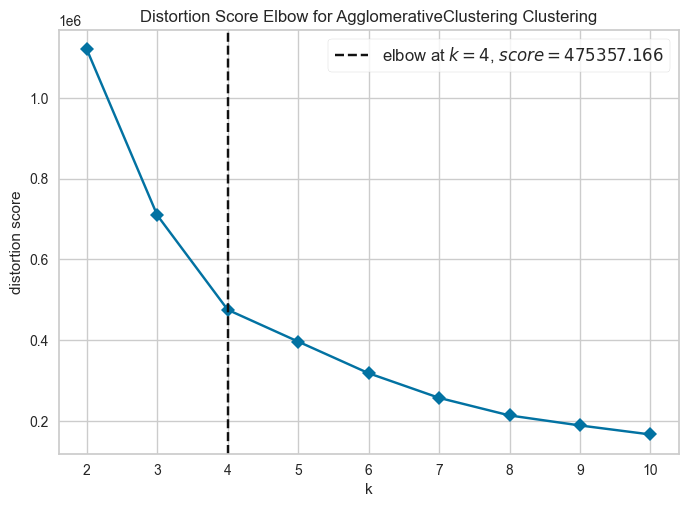

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=10),
                 timings=False)

In [139]:
kelbow_visualizer(AgglomerativeClustering(), vendas, k=10, timings=False)

In [140]:
# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = vendas.copy()

for k in range(2,11):
  model = AgglomerativeClustering(n_clusters=k)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  # cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,
2,0.521159,0.841714,12114.845821
3,0.524004,0.618229,12664.434394
4,0.469991,0.804275,14355.287513
5,0.471415,0.743030,13434.380393
6,0.466185,0.744051,13918.504728
7,0.495182,0.703191,14769.834974
8,0.483700,0.742325,15546.335077
9,0.475935,0.755924,15563.096905
10,0.475161,0.739250,15844.084666


In [141]:
hclust = AgglomerativeClustering(n_clusters=4)
hclust_labels = hclust.fit_predict(vendas)

In [144]:
px.scatter_3d(vendas, x='Vlr_Liquido', y='N_Boletos', z='Acessos', color=hclust_labels.astype(str), color_discrete_sequence=px.colors.qualitative.D3, template='plotly_dark')

In [145]:
# Select best model by covariance type and K (Practical Statistics for Data Scientists)
results = []
k_range = range(1,9)
covariance_types = ['full', 'tied', 'diag', 'spherical']
X = vendas.copy()

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, n_init=10, warm_start=True, covariance_type=covariance_type)
    mclust.fit(X)
    results.append({
      'bic': mclust.bic(X),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results.sort_values('bic').head()

,bic,n_components,covariance_type
28,-232199.159245,8,full
24,-203180.425575,7,full
20,-203109.096918,6,full
16,-170689.217855,5,full
12,-158614.755953,4,full


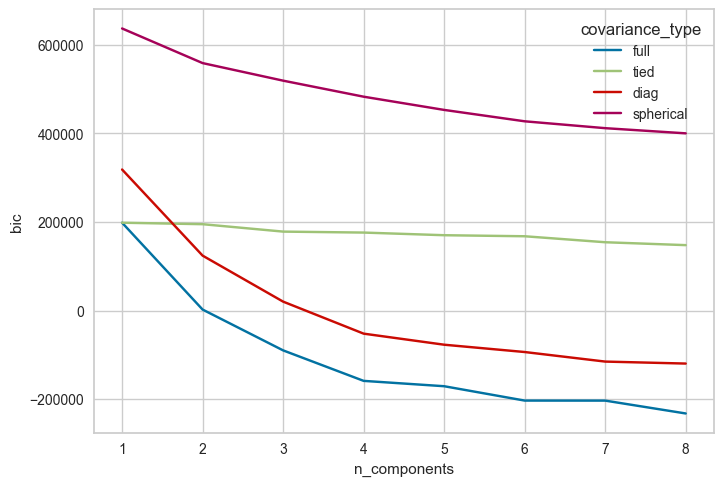

In [146]:
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type');

In [147]:
mclust = GaussianMixture(n_components=5, covariance_type='full', n_init=10)
mclust_labels = mclust.fit_predict(vendas)

In [149]:
px.scatter_3d(vendas, x='Vlr_Liquido', y='Acessos', z='N_Boletos', color=mclust_labels.astype(str), color_discrete_sequence=px.colors.qualitative.D3, template='plotly_dark')

In [150]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=vendas.columns)

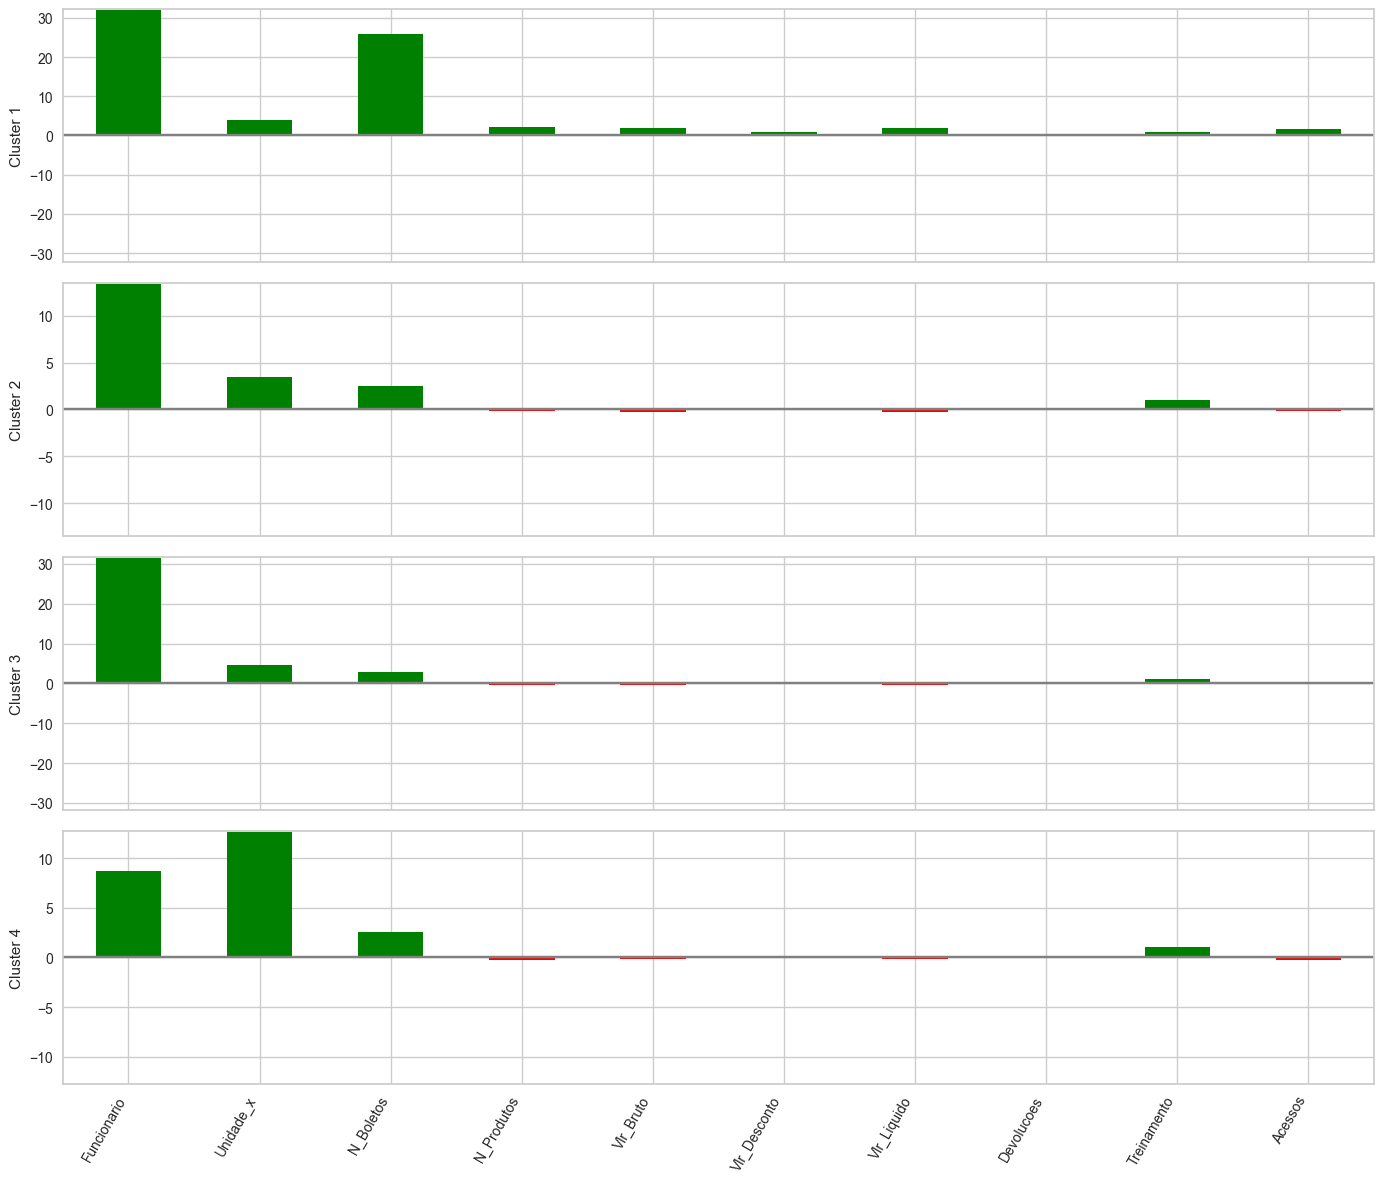

In [151]:
fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none') 

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [152]:
(
  vendas.assign(cluster=kmeans_labels)
  .groupby('cluster')
  .mean()
  .transpose()
  .style.background_gradient(cmap='YlOrRd', axis=1)
)

cluster,0,1,2,3
Funcionario,31.973468,13.372497,31.431579,8.716138
Unidade_x,4.014639,3.413676,4.555263,12.613105
N_Boletos,25.914913,2.535701,2.890977,2.526742
N_Produtos,2.193858,-0.208120,-0.281240,-0.254433
Vlr_Bruto,1.965650,-0.220867,-0.293918,-0.181060
Vlr_Desconto,0.961428,-0.095612,-0.171320,-0.079195
Vlr_Liquido,1.993363,-0.227003,-0.294802,-0.183768
Devolucoes,0.000000,0.033623,0.048872,0.035656
Treinamento,1.000000,1.000000,0.997744,1.000000
Acessos,1.661820,-0.185779,-0.123978,-0.230338


In [153]:
vendas.describe()

,Funcionario,Unidade_x,N_Boletos,N_Produtos,Vlr_Bruto,Vlr_Desconto,Vlr_Liquido,Devolucoes,Treinamento,Acessos
count,10719.000000,10719.000000,10719.000000,1.071900e+04,1.071900e+04,1.071900e+04,1.071900e+04,10719.000000,10719.000000,1.071900e+04
mean,17.874522,7.464969,5.004198,-8.484884e-17,-2.121221e-17,-6.893968e-17,-1.166672e-16,0.034798,0.999440,5.303052e-18
std,11.437125,4.938478,7.897947,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,0.183276,0.023654,1.000047e+00
min,0.000000,0.000000,0.000000,-3.294215e+00,-2.224387e+00,-7.094608e+00,-2.287952e+00,0.000000,0.000000,-5.132603e-01
25%,8.000000,4.000000,1.000000,-6.073638e-01,-6.285121e-01,-5.479082e-01,-6.239501e-01,0.000000,1.000000,-5.132603e-01
50%,16.000000,6.000000,2.000000,-3.796645e-01,-3.238896e-01,-2.835660e-01,-3.235168e-01,0.000000,1.000000,-3.752501e-01
75%,31.000000,13.000000,4.000000,1.668138e-01,2.519728e-01,3.521990e-01,2.391124e-01,0.000000,1.000000,3.878035e-02
max,39.000000,13.000000,90.000000,9.320325e+00,1.593501e+01,1.386634e+01,1.577488e+01,1.000000,1.000000,1.038954e+01


In [154]:
vendas.corr()

,Funcionario,Unidade_x,N_Boletos,N_Produtos,Vlr_Bruto,Vlr_Desconto,Vlr_Liquido,Devolucoes,Treinamento,Acessos
Funcionario,1.000000,-0.423480,0.393540,0.312823,0.257340,0.116490,0.262024,-0.011092,-0.012675,0.257561
Unidade_x,-0.423480,1.000000,-0.212691,-0.169783,-0.110237,-0.040992,-0.111893,-0.001488,-0.026526,-0.166003
N_Boletos,0.393540,-0.212691,1.000000,0.873497,0.828196,0.466471,0.836072,-0.104198,0.011000,0.632153
N_Produtos,0.312823,-0.169783,0.873497,1.000000,0.854832,0.520161,0.858596,-0.166857,0.014733,0.582224
Vlr_Bruto,0.257340,-0.110237,0.828196,0.854832,1.000000,0.670781,0.999108,-0.173757,0.011111,0.587608
Vlr_Desconto,0.116490,-0.040992,0.466471,0.520161,0.670781,1.000000,0.653890,-0.104581,0.002785,0.401451
Vlr_Liquido,0.262024,-0.111893,0.836072,0.858596,0.999108,0.653890,1.000000,-0.173090,0.011225,0.591987
Devolucoes,-0.011092,-0.001488,-0.104198,-0.166857,-0.173757,-0.104581,-0.173090,1.000000,0.004494,-0.057059
Treinamento,-0.012675,-0.026526,0.011000,0.014733,0.011111,0.002785,0.011225,0.004494,1.000000,0.007248
Acessos,0.257561,-0.166003,0.632153,0.582224,0.587608,0.401451,0.591987,-0.057059,0.007248,1.000000


<Axes: xlabel='Vlr_Liquido', ylabel='Count'>

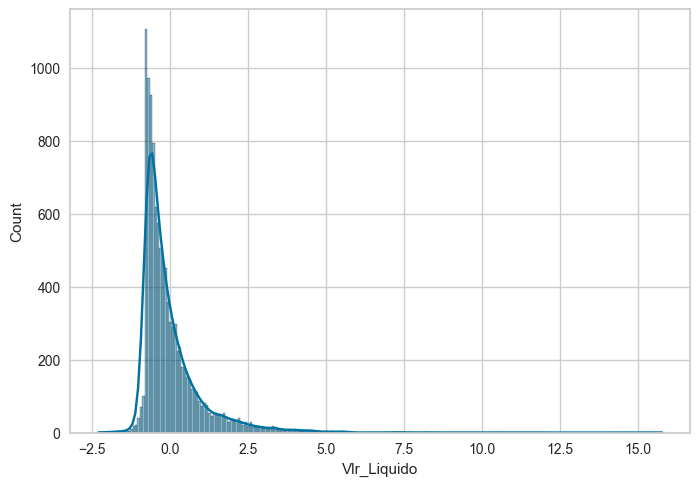

In [155]:
sns.histplot(vendas, x='Vlr_Liquido', kde=True)

In [156]:
import statsmodels.formula.api as smf
function = 'Vlr_Liquido ~ Vlr_Bruto + Vlr_Desconto + N_Boletos + N_Produtos + Funcionario'+ '-1'

model = smf.ols(formula=function, data=vendas).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            Vlr_Liquido   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.760e+06
Date:                Wed, 14 Aug 2024   Prob (F-statistic):                        0.00
Time:                        09:04:42   Log-Likelihood:                          20763.
No. Observations:               10719   AIC:                                 -4.152e+04
Df Residuals:                   10714   BIC:                                 -4.148e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [158]:
x = vendas[['Vlr_Bruto', 'Vlr_Desconto', 'N_Boletos', 'N_Produtos', 'Funcionario', 'Acessos']]
y = vendas['Vlr_Liquido']

In [159]:
#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

LinearRegression()

In [160]:
r_sq = lr.score(x, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.9988263918336568


In [161]:
y_pred_train = lr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 0.01935027920301664
MSE: 0.0011586290673559164
RMSE: 0.03403864079771571


In [162]:
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.01934190437100267
MSE: 0.0012335175757718028
RMSE: 0.03512146887263975


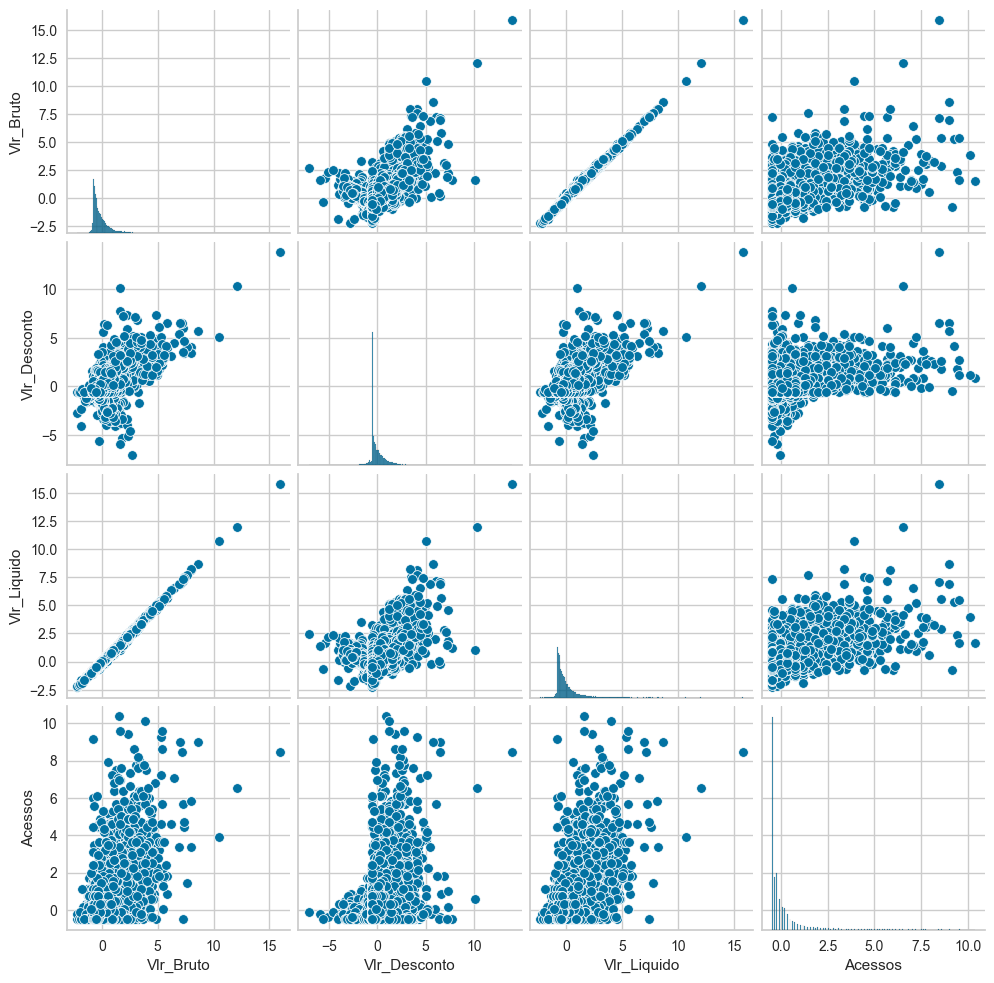

In [164]:
sns.pairplot(vendas[['Vlr_Bruto', 'Vlr_Desconto', 'Vlr_Liquido', 'Acessos']])